<a href="https://colab.research.google.com/github/nicolassalomon96/IA_Identificacion_y_Control/blob/main/TP_Programaci%C3%B3n_1/Aprendizaje_Competitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Programación 1 - Clasificador basado en Ley de Aprendizaje Competitivo

Desarrollar el código de un algortitmo que realice la tarea de Clasificación basado en una ley de aprendizaje competitivo capaz de clasificar los Clusters A y B, considerando un conjunto de datos de entrada para el entrenamiento infinito.

## 1. Importamos librerias necesarias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 2. Visualización de Clusters a clasificar

In [3]:
#Cantidad de muestras de cada cluster
samples_A = 1000 
samples_B = 1000

cluster_A = []
cluster_B = []

for i in range(samples_A):
  cluster_A.append((np.random.uniform(0,1), np.random.uniform(2,3)))
cluster_A = np.array(cluster_A)

for i in range(samples_B):
  cluster_B.append((np.random.uniform(2,3), np.random.uniform(0,1)))
cluster_B = np.array(cluster_B)

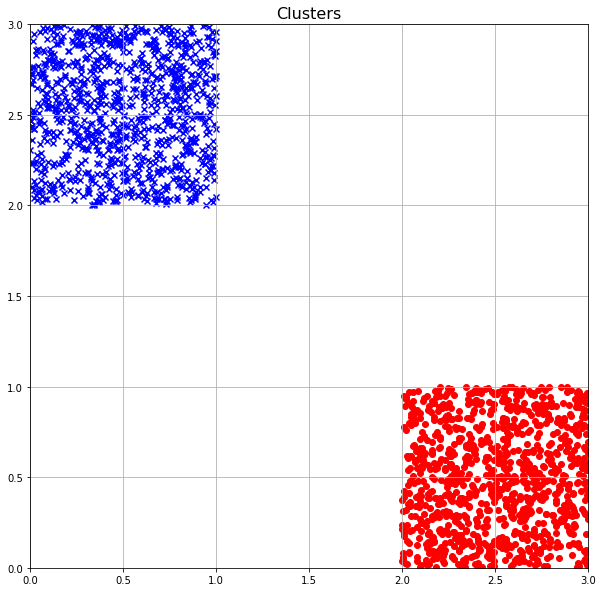

In [4]:
fig = plt.figure(figsize=(10,10))
plt.scatter(cluster_A[:,0], cluster_A[:,1], marker='x', color='blue')
plt.scatter(cluster_B[:,0], cluster_B[:,1], marker='o', color='red')
plt.xlim((0,3))
plt.ylim((0,3))
plt.title('Clusters', fontsize=16)
plt.grid()

## 3. Creamos la Neurona

Se generan de forma aleatoria punto pertenecientes a los dos clusters posibles. Luego se aplica la regla de aprendizaje competitivo, para luego calcular el error cuadrativo medio como *mse = ||∆w1|| + ||∆w2||*.

En base al error calculado y a un umbral fijado de manera empírica se detiene el proceso de entrenamiento y se muestra por pantalla el número de la última iteración junto con los valores de pesos iniciales y finales.

In [40]:
def load_weights():
    weights = np.array(([0.5,1.0],[2.5,2.0]))
    return weights

def get_random_input(x_A=(0,1), y_A=(2,3), x_B=(2,3), y_B=(0,1)):
  a = np.random.randint(2) #Numero aleatorio: 0 o 1
  if a == 0:
    return np.array((np.random.uniform(x_A[0], x_A[1]), np.random.uniform(y_A[0], y_A[1])))
  else:
    return np.array((np.random.uniform(x_B[0], x_B[1]), np.random.uniform(y_B[0], y_B[1])))

def winner_neural_network(inputs, weights):
  v = np.dot(weights, inputs) #Salidas de cada neurona (2 neuronas --> salida = 1x2)
  winner_neuron_pos = np.argmax(v) #Posición del arreglo donde esta la salida de mayor valor
  y = np.zeros(weights.shape[0]) #Salida de la red neuronal (la neurona que tenga un peso mayor tendrá un 1 y las demás 0)
  y[winner_neuron_pos] = 1
 
  return v, winner_neuron_pos, y

def update_weights(winner_neuron_pos, weights, inputs, lr=0.1):
  weights_copy = np.copy(weights)
  inputs_copy = np.copy(inputs)

  for i in range(weights_copy.shape[1]):
    weights_copy[winner_neuron_pos, i] = weights[winner_neuron_pos, i] + lr * (inputs_copy[i] - weights[winner_neuron_pos, i])
  
  error1 = inputs_copy[0] - weights[winner_neuron_pos, 0]
  error2 = inputs_copy[1] - weights[winner_neuron_pos, 1]
  mse = np.sqrt(error1**2 + error2**2)
  return weights_copy, mse

def train_network(n_iter, lr=0.01):
  threshold = 0.1
  saved_weights = []
  weights = load_weights()
  saved_weights.append(weights) #Lista para ir guardando los pesos

  for i in range(n_iter):
    error_threshold = 0.01
    inputs = get_random_input()
    v, winner_neuron_pos, y = winner_neural_network(inputs, saved_weights[-1])
    new_weights, mse = update_weights(winner_neuron_pos, saved_weights[-1], inputs)
    saved_weights.append(new_weights)

    if mse < error_threshold:
      print(f"Proceso finalizado por umbral de error - Iteración: {i} - mse = {mse}")
      break

  saved_weights = np.array((saved_weights))
  print(f"\nPesos iniciales: {saved_weights[0]}")
  print(f"\nPesos finales: {saved_weights[-1]}")
  return saved_weights

def test_network(input_test, weights):
  out = np.dot(weights, input_test)
  winner_pos = np.argmax(out)
  y = np.zeros(weights.shape[0]).astype(int)
  y[winner_pos] = 1
  return y

##4. Entrenamos la Neurona

In [96]:
final_weights = train_network(4000, lr=0.01)

Proceso finalizado por umbral de error - Iteración: 2339 - mse = 0.008689175789576897

Pesos iniciales: [[0.5 1. ]
 [2.5 2. ]]

Pesos finales: [[0.42093294 2.4518743 ]
 [2.41502887 0.54592119]]


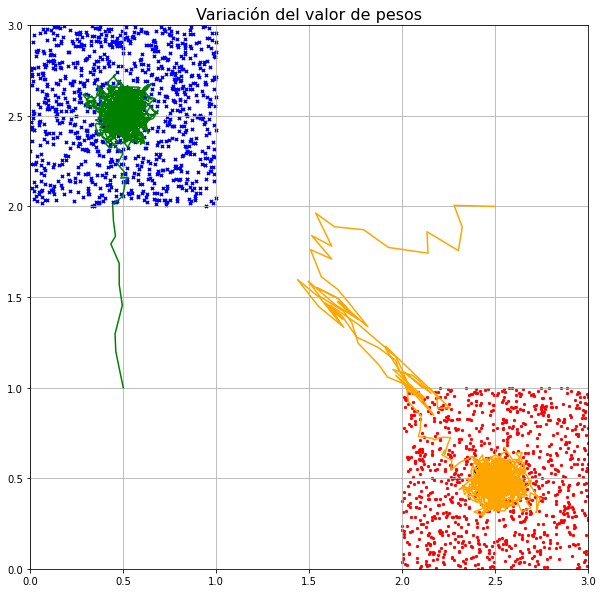

In [97]:
w1i = final_weights[0:,0]
w2i = final_weights[0:,1]

fig = plt.figure(figsize=(10,10))
plt.scatter(w2i[-1,0], w2i[-1,1], color='black', s=100, marker = 'o')
plt.scatter(w1i[-1,0], w1i[-1,1], color='black', s=100, marker = 'o')
plt.scatter(cluster_A[:,0], cluster_A[:,1], marker='x', color='blue', s=10)
plt.scatter(cluster_B[:,0], cluster_B[:,1], marker='o', color='red', s=5)
plt.plot(w2i[:,0], w2i[:,1], color='orange')#, s=5)
plt.plot(w1i[:,0], w1i[:,1], color='green')#, s=5)
plt.xlim((0,3))
plt.ylim((0,3))
plt.title('Variación del valor de pesos', fontsize=16)
plt.grid()

In [98]:
entrada = np.array([1.5,3])
y = test_network(final_weights[-1],entrada)
y


array([1, 0])

Se puede apreciar el correcto entrenamiento de nuestra red al observar como los pesos tienden al valor del centroide del cluster más cercano.

##5. Prueba sobre un dataset de test

In [99]:
N = 5000
n_cluster = 0
test_points = []
test_labels = []
cluster_pred = []

for i in range(N):
  if n_cluster == 0:
    test_points.append(np.array((np.random.uniform(0,1), np.random.uniform(2,3))))
    test_labels.append(0)
    n_cluster = 1
  else:
    test_points.append(np.array((np.random.uniform(2,3), np.random.uniform(0,1))))
    test_labels.append(1)
    n_cluster = 0

test_points = np.array((test_points))
test_labels = np.array((test_labels))

for i in range(len(test_points)):
  cluster_pred.append(test_network(final_weights[-1], test_points[i]))


In [100]:
count = 0
for i in range(len(test_points)):
  if np.argmax(cluster_pred[0]) != test_labels[0]:
    count += 1
print(f"Total del puntos clasificados incorrectamente: {count}")

Total del puntos clasificados incorrectamente: 0


Se observa como la red clasificó correctamente todos los puntos generados para cada cluster.

A continuación se graficará la región de decisión para el clasificador desarrollado mediante un aprendizaje competitivo

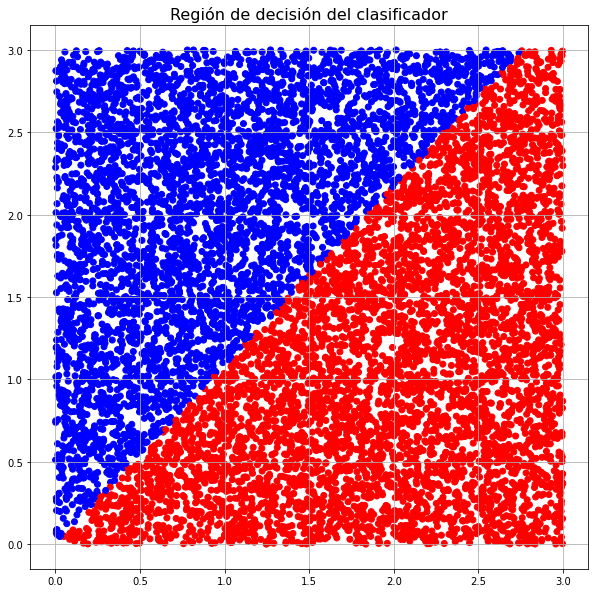

In [101]:
n_points = 10000
points = []
results = []
for i in range (n_points):
  point = np.array((np.random.uniform(0,3), np.random.uniform(0,3)))
  points.append(point)
  out_nn = test_network(final_weights[-1], point)
  results.append(np.argmax(out_nn))

points = np.array(points)
results = np.array(results)


fig3 = plt.figure(figsize=(10,10))
colormap = np.array(['b','r'])
plt.scatter(points[:,0], points[:,1], c=colormap[results])
plt.grid()
plt.title('Región de decisión del clasificador', fontsize=16)
plt.show()

Se puede observar como se traza una región casí perfecta en donde todos los puntos rojos estan más cerca del centro del cluster B (2.5,0,5) que del centro del cluster A (0.5,2.5). Análogamente, todos los puntos azules estan más cerca del centro del cluster A (0.5,2.5) que del centro del cluster B (2.5,0,5).